In [ ]:
!pip install ultralytics roboflow

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Model Training**

In [ ]:
from roboflow import Roboflow

rf = Roboflow(api_key="F54IOnXdXi2DX0hlO1mI")
project = rf.workspace("roboflow-universe-projects").project("license-plate-recognition-rxg4e")
dataset = project.version(1).download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to License-Plate-Recognition-1 in yolov8:: 100%|██████████| 20264/20264 [00:03<00:00, 5401.43it/s]


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
import os
os.listdir('/content/License-Plate-Recognition-1/')

['train',
 'README.roboflow.txt',
 'data.yaml',
 'test',
 'README.dataset.txt',
 'valid']

In [ ]:
from ultralytics import YOLO

model = YOLO("yolov8n.pt")
model.train(data="/content/License-Plate-Recognition-1/data.yaml", epochs=25, imgsz=640)

100%|██████████| 6.25M/6.25M [00:00<00:00, 128MB/s]


Ultralytics 8.3.107 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/License-Plate-Recognition-1/data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_box

100%|██████████| 755k/755k [00:00<00:00, 20.9MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 83.6MB/s]


AMP: checks passed ✅


train: Scanning /content/License-Plate-Recognition-1/train/labels... 7058 images, 5 backgrounds, 0 corrupt: 100%|██████████| 7058/7058 [00:02<00:00, 2410.58it/s]


train: New cache created: /content/License-Plate-Recognition-1/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/License-Plate-Recognition-1/valid/labels... 2048 images, 3 backgrounds, 0 corrupt: 100%|██████████| 2048/2048 [00:02<00:00, 837.59it/s] 


val: New cache created: /content/License-Plate-Recognition-1/valid/labels.cache
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      2.16G      1.256      1.472      1.154          6        640: 100%|██████████| 442/442 [02:19<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:17<00:00,  3.56it/s]


                   all       2048       2134      0.847      0.879      0.893      0.572

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      3.05G      1.266     0.8492      1.151          8        640: 100%|██████████| 442/442 [02:14<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:17<00:00,  3.69it/s]

                   all       2048       2134      0.928      0.863      0.931      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      3.06G      1.258     0.7788      1.154          5        640: 100%|██████████| 442/442 [02:19<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:18<00:00,  3.41it/s]

                   all       2048       2134      0.959       0.92      0.954      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      3.07G      1.237     0.7258      1.139          2        640: 100%|██████████| 442/442 [02:15<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:19<00:00,  3.29it/s]

                   all       2048       2134      0.955      0.914      0.947      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      3.09G      1.222     0.6811      1.129          3        640: 100%|██████████| 442/442 [02:13<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:16<00:00,  3.86it/s]

                   all       2048       2134       0.96      0.899      0.948      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      3.11G      1.194     0.6588      1.115          6        640: 100%|██████████| 442/442 [02:08<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:17<00:00,  3.72it/s]

                   all       2048       2134       0.97      0.932      0.965      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      3.12G      1.184     0.6377      1.109          1        640: 100%|██████████| 442/442 [02:10<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:15<00:00,  4.11it/s]

                   all       2048       2134      0.959      0.928      0.953      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      3.14G      1.168     0.6188      1.103          5        640: 100%|██████████| 442/442 [02:09<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:21<00:00,  2.97it/s]

                   all       2048       2134      0.966      0.932      0.966      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      3.16G      1.157     0.5995      1.103          2        640: 100%|██████████| 442/442 [02:11<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:17<00:00,  3.57it/s]

                   all       2048       2134      0.969      0.938      0.968      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      3.18G      1.156     0.5865      1.093          5        640: 100%|██████████| 442/442 [02:08<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:15<00:00,  4.03it/s]

                   all       2048       2134      0.982      0.942      0.974      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      3.19G      1.136     0.5758      1.081          3        640: 100%|██████████| 442/442 [02:11<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:16<00:00,  3.87it/s]

                   all       2048       2134      0.979      0.947      0.974      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      3.21G      1.128     0.5601      1.083          6        640: 100%|██████████| 442/442 [02:07<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:15<00:00,  4.19it/s]

                   all       2048       2134      0.977       0.94      0.976      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      3.23G      1.113     0.5456      1.075          4        640: 100%|██████████| 442/442 [02:07<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:15<00:00,  4.08it/s]

                   all       2048       2134      0.983      0.939      0.977      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      3.24G      1.112     0.5351      1.077          3        640: 100%|██████████| 442/442 [02:07<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:16<00:00,  3.83it/s]

                   all       2048       2134      0.977      0.945      0.979      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      3.26G      1.096     0.5251      1.064          6        640: 100%|██████████| 442/442 [02:09<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:15<00:00,  4.07it/s]

                   all       2048       2134      0.983      0.943      0.975      0.688


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      3.28G      1.091     0.4791      1.084          2        640: 100%|██████████| 442/442 [02:05<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:15<00:00,  4.11it/s]

                   all       2048       2134      0.986      0.944      0.976      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      3.29G       1.08     0.4721      1.075          2        640: 100%|██████████| 442/442 [02:02<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:15<00:00,  4.17it/s]

                   all       2048       2134       0.98      0.944      0.976      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      3.31G      1.071     0.4568      1.072          2        640: 100%|██████████| 442/442 [02:02<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:15<00:00,  4.05it/s]

                   all       2048       2134      0.978      0.949      0.979      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      3.33G      1.069     0.4548      1.067          2        640: 100%|██████████| 442/442 [02:02<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:15<00:00,  4.19it/s]

                   all       2048       2134      0.982      0.945      0.979        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      3.35G      1.046     0.4379      1.055          2        640: 100%|██████████| 442/442 [02:02<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:15<00:00,  4.16it/s]

                   all       2048       2134      0.979      0.946       0.98      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      3.36G      1.036     0.4292      1.055          2        640: 100%|██████████| 442/442 [02:01<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:15<00:00,  4.19it/s]

                   all       2048       2134      0.983      0.952      0.981      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      3.38G      1.033     0.4207      1.047          2        640: 100%|██████████| 442/442 [02:01<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:16<00:00,  3.91it/s]

                   all       2048       2134      0.982      0.952      0.982       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25       3.4G      1.025     0.4087      1.045          2        640: 100%|██████████| 442/442 [02:00<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:16<00:00,  3.77it/s]

                   all       2048       2134      0.984       0.95      0.982      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      3.41G      1.012      0.398       1.04          2        640: 100%|██████████| 442/442 [02:01<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:16<00:00,  3.94it/s]

                   all       2048       2134      0.984      0.952      0.982      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      3.43G      1.002     0.3912      1.033          2        640: 100%|██████████| 442/442 [02:01<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:15<00:00,  4.00it/s]

                   all       2048       2134      0.985      0.952      0.983      0.718



25 epochs completed in 1.007 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.107 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:17<00:00,  3.61it/s]


                   all       2048       2134      0.985      0.952      0.983      0.718
Speed: 0.2ms preprocess, 1.8ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7be61a985550>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [ ]:
import shutil

# Define source and destination paths
src_dataset = '/content/License-Plate-Recognition-1'
src_runs = '/content/runs'
dst_drive = '/content/drive/MyDrive'  # Adjust if needed

# Move dataset folder
shutil.move(src_dataset, f'{dst_drive}/License-Plate-Recognition-1')

# Move runs folder
shutil.move(src_runs, f'{dst_drive}/runs')

print("Both folders have been moved to Google Drive successfully!")


Both folders have been moved to Google Drive successfully!


## **Performance Metrics**

In [3]:
from ultralytics import YOLO

model = YOLO("runs/runs/detect/train/weights/best.pt")
metrics = model.val(data="License Plate Recognition/data.yaml", imgsz=640, device = "mps")

print("\nPerformance Metrics:")
for key, value in metrics.results_dict.items():
    print(f"{key}: {value}")

Ultralytics 8.3.51 🚀 Python-3.12.4 torch-2.5.1 MPS (Apple M2)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /Users/nandanpatel/Projects/Licence_Plate/License Plate Recognitio
                 Class     Images  Instances      Box(P          R      mAP50  m

WARNING ⚠️ NMS time limit 2.800s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       2048       2195      0.991      0.925      0.966      0.703
Speed: 0.5ms preprocess, 5.9ms inference, 0.0ms loss, 9.8ms postprocess per image
Results saved to runs/detect/val5

Performance Metrics:
metrics/precision(B): 0.9910923890920325
metrics/recall(B): 0.9248291571753986
metrics/mAP50(B): 0.9660175116681777
metrics/mAP50-95(B): 0.7032988805901211
fitness: 0.7295707436979268


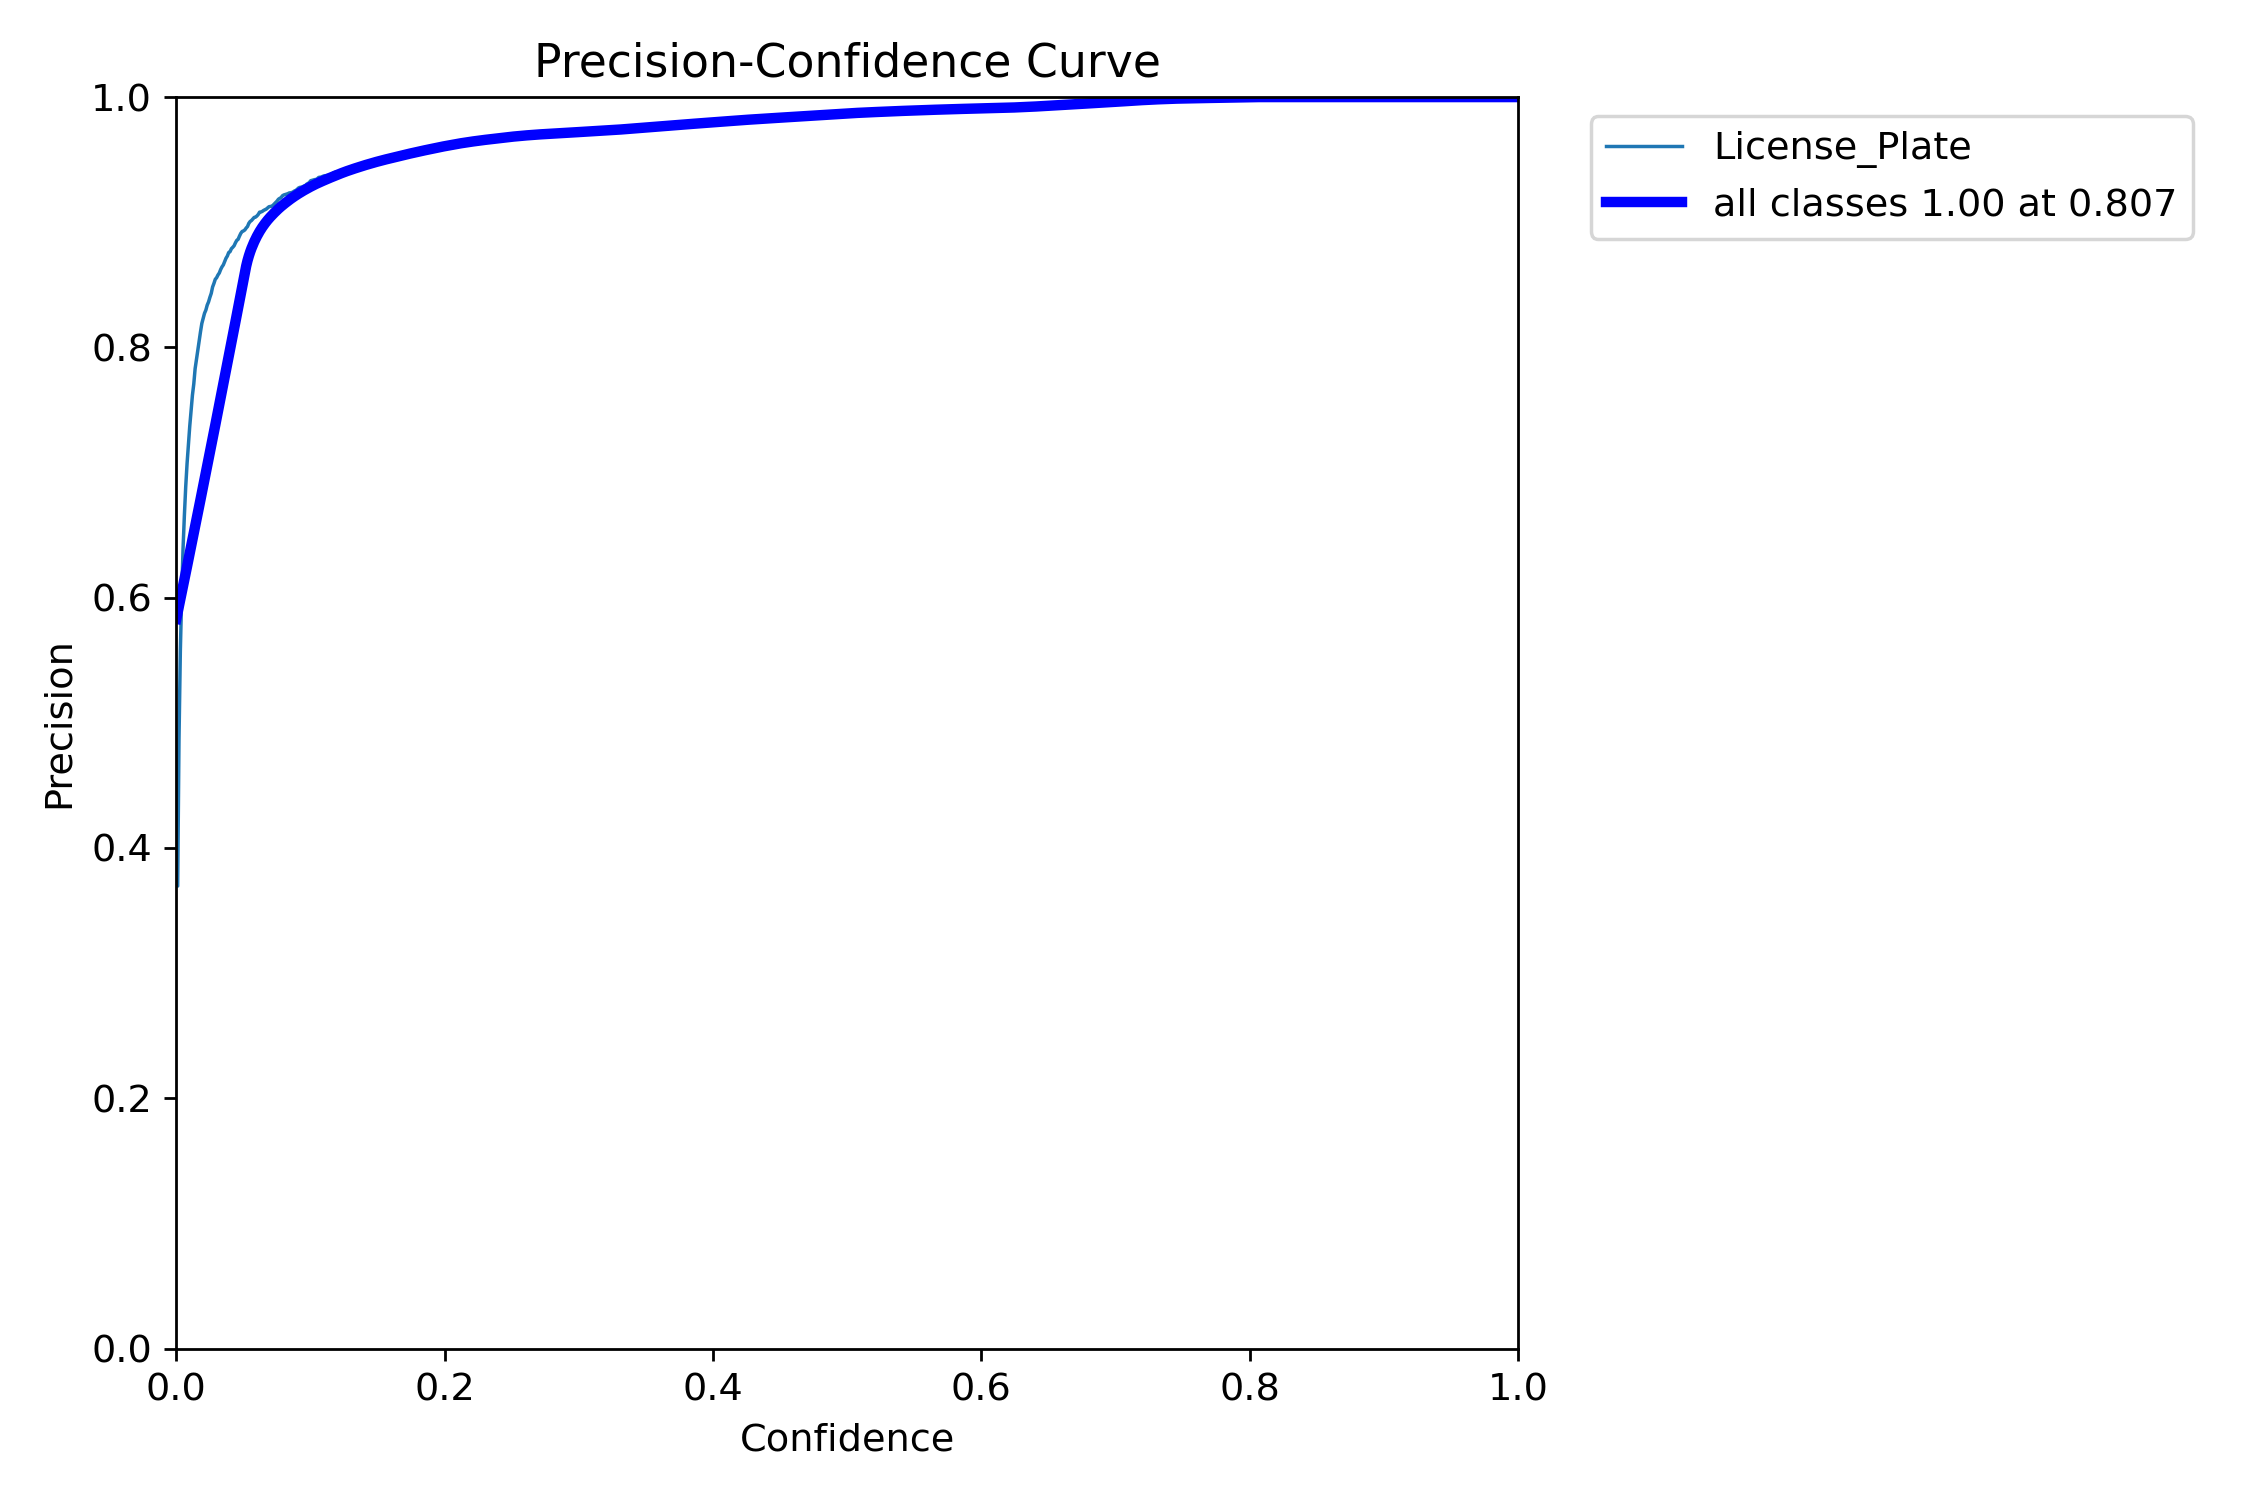

In [ ]:
from PIL import Image
import IPython.display as display

# Load and show the image
img = Image.open('/content/drive/MyDrive/runs/runs/detect/train/P_curve.png')
display.display(img)

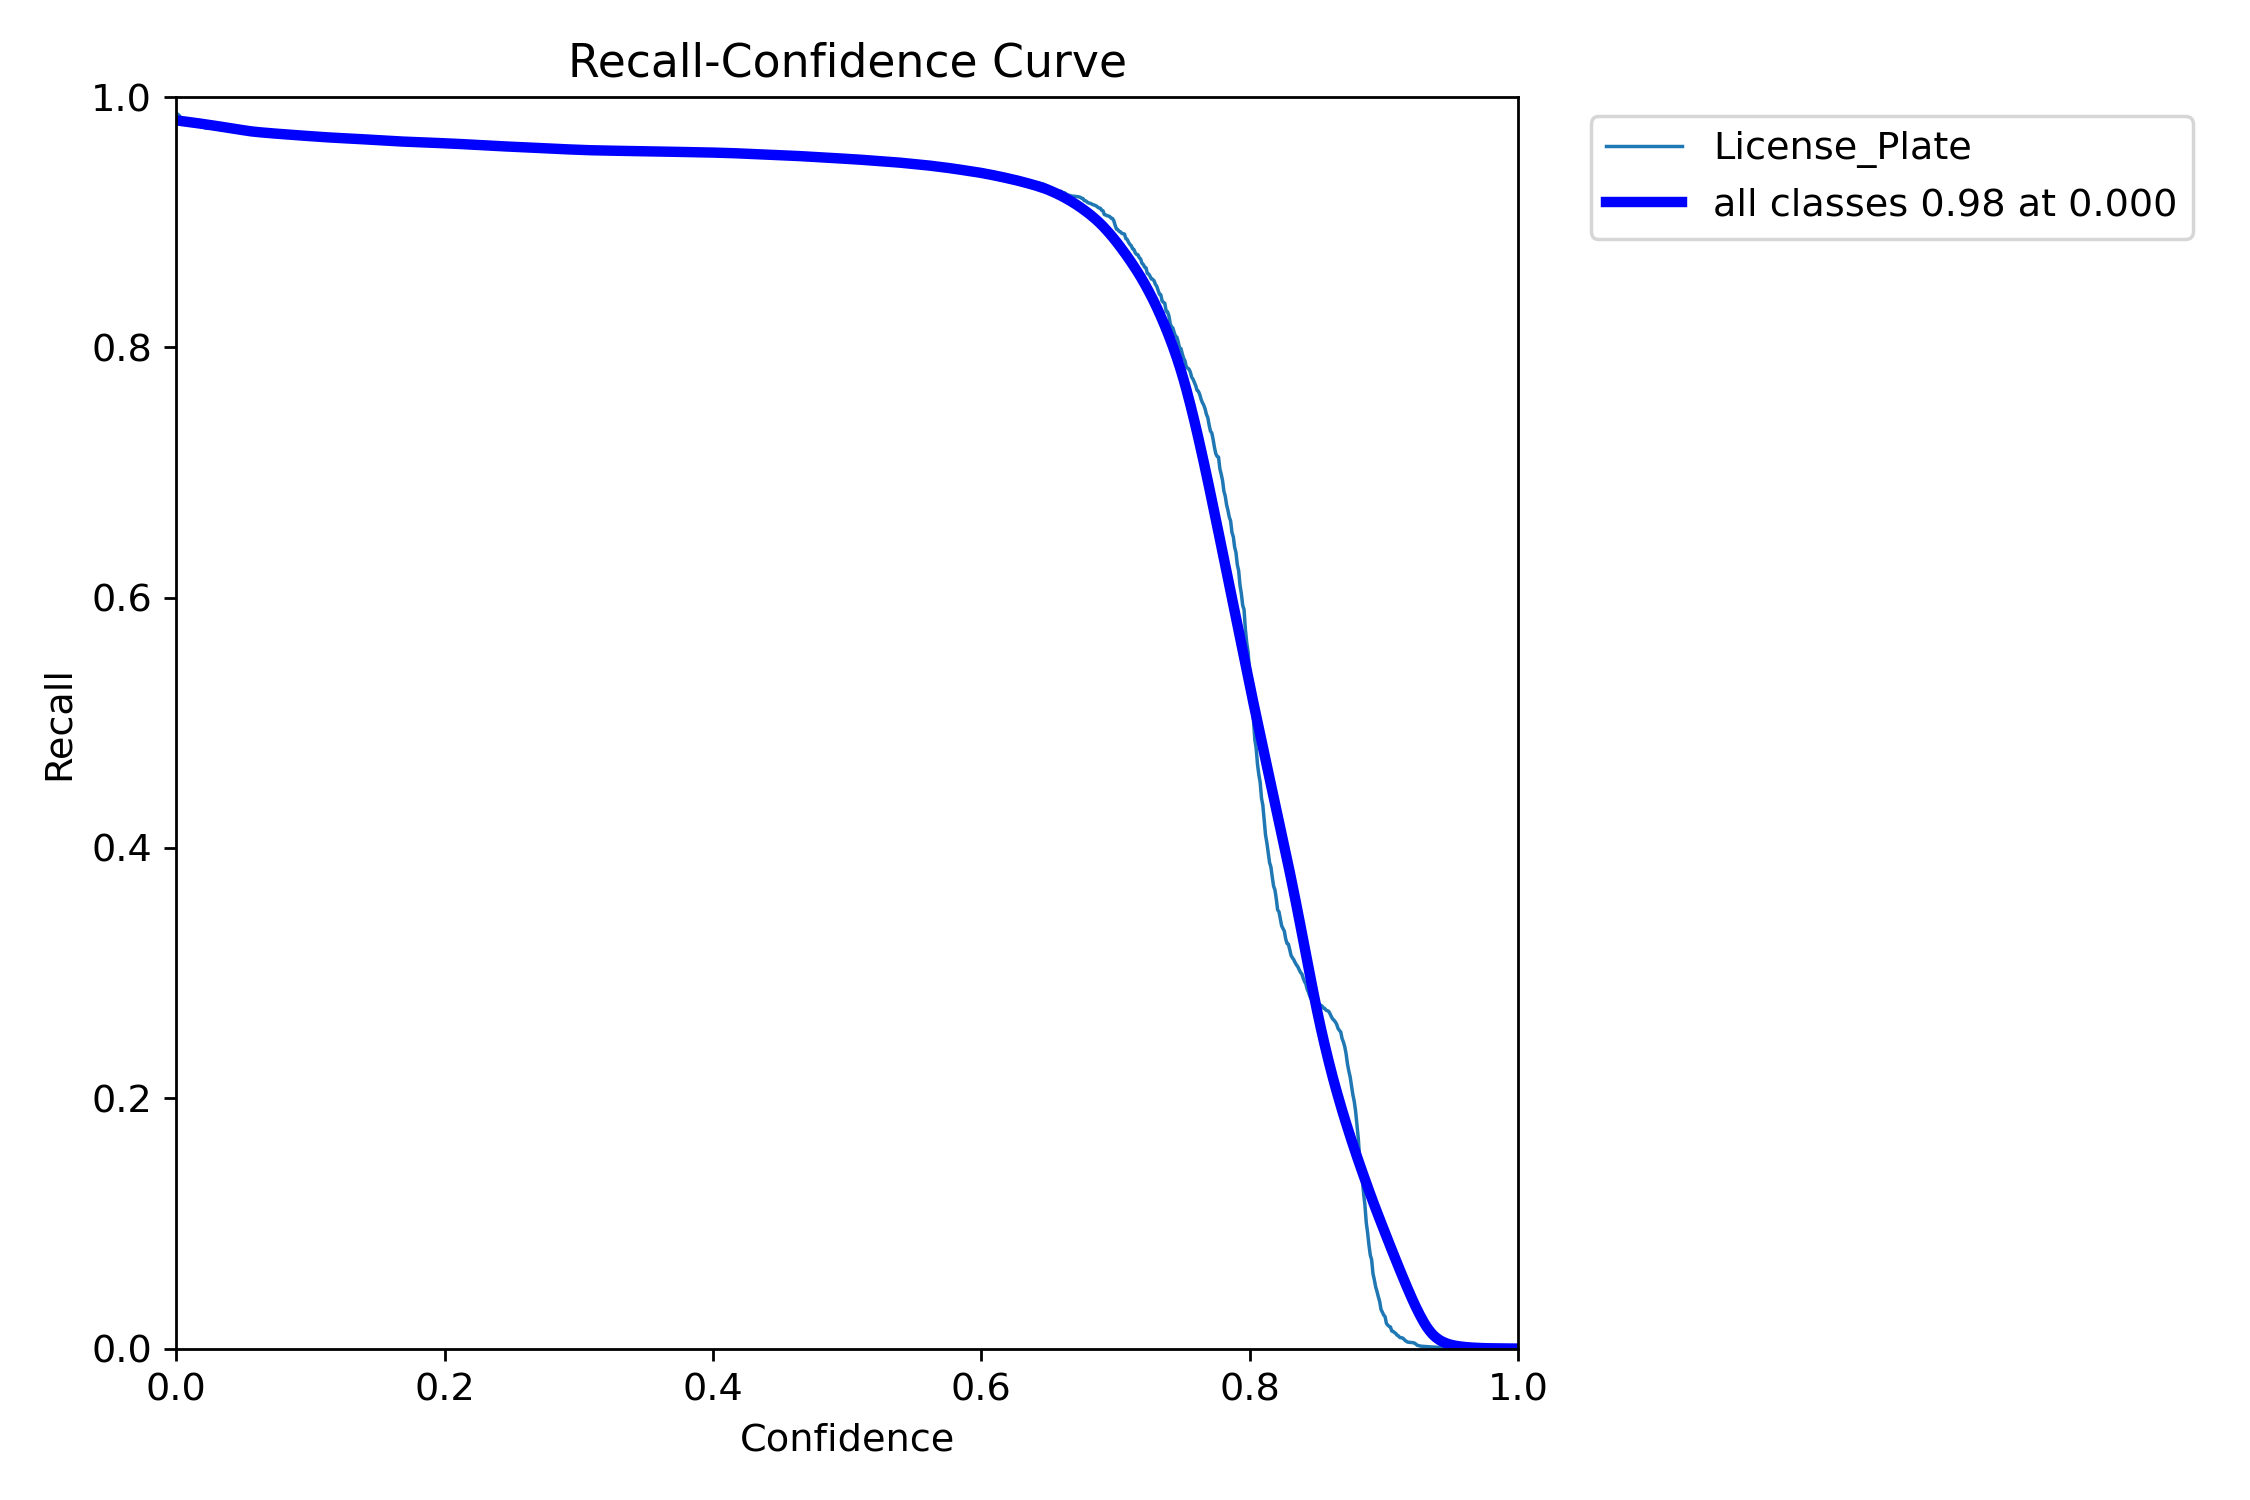

In [ ]:
img = Image.open('/content/drive/MyDrive/runs/runs/detect/train/R_curve.png')
display.display(img)

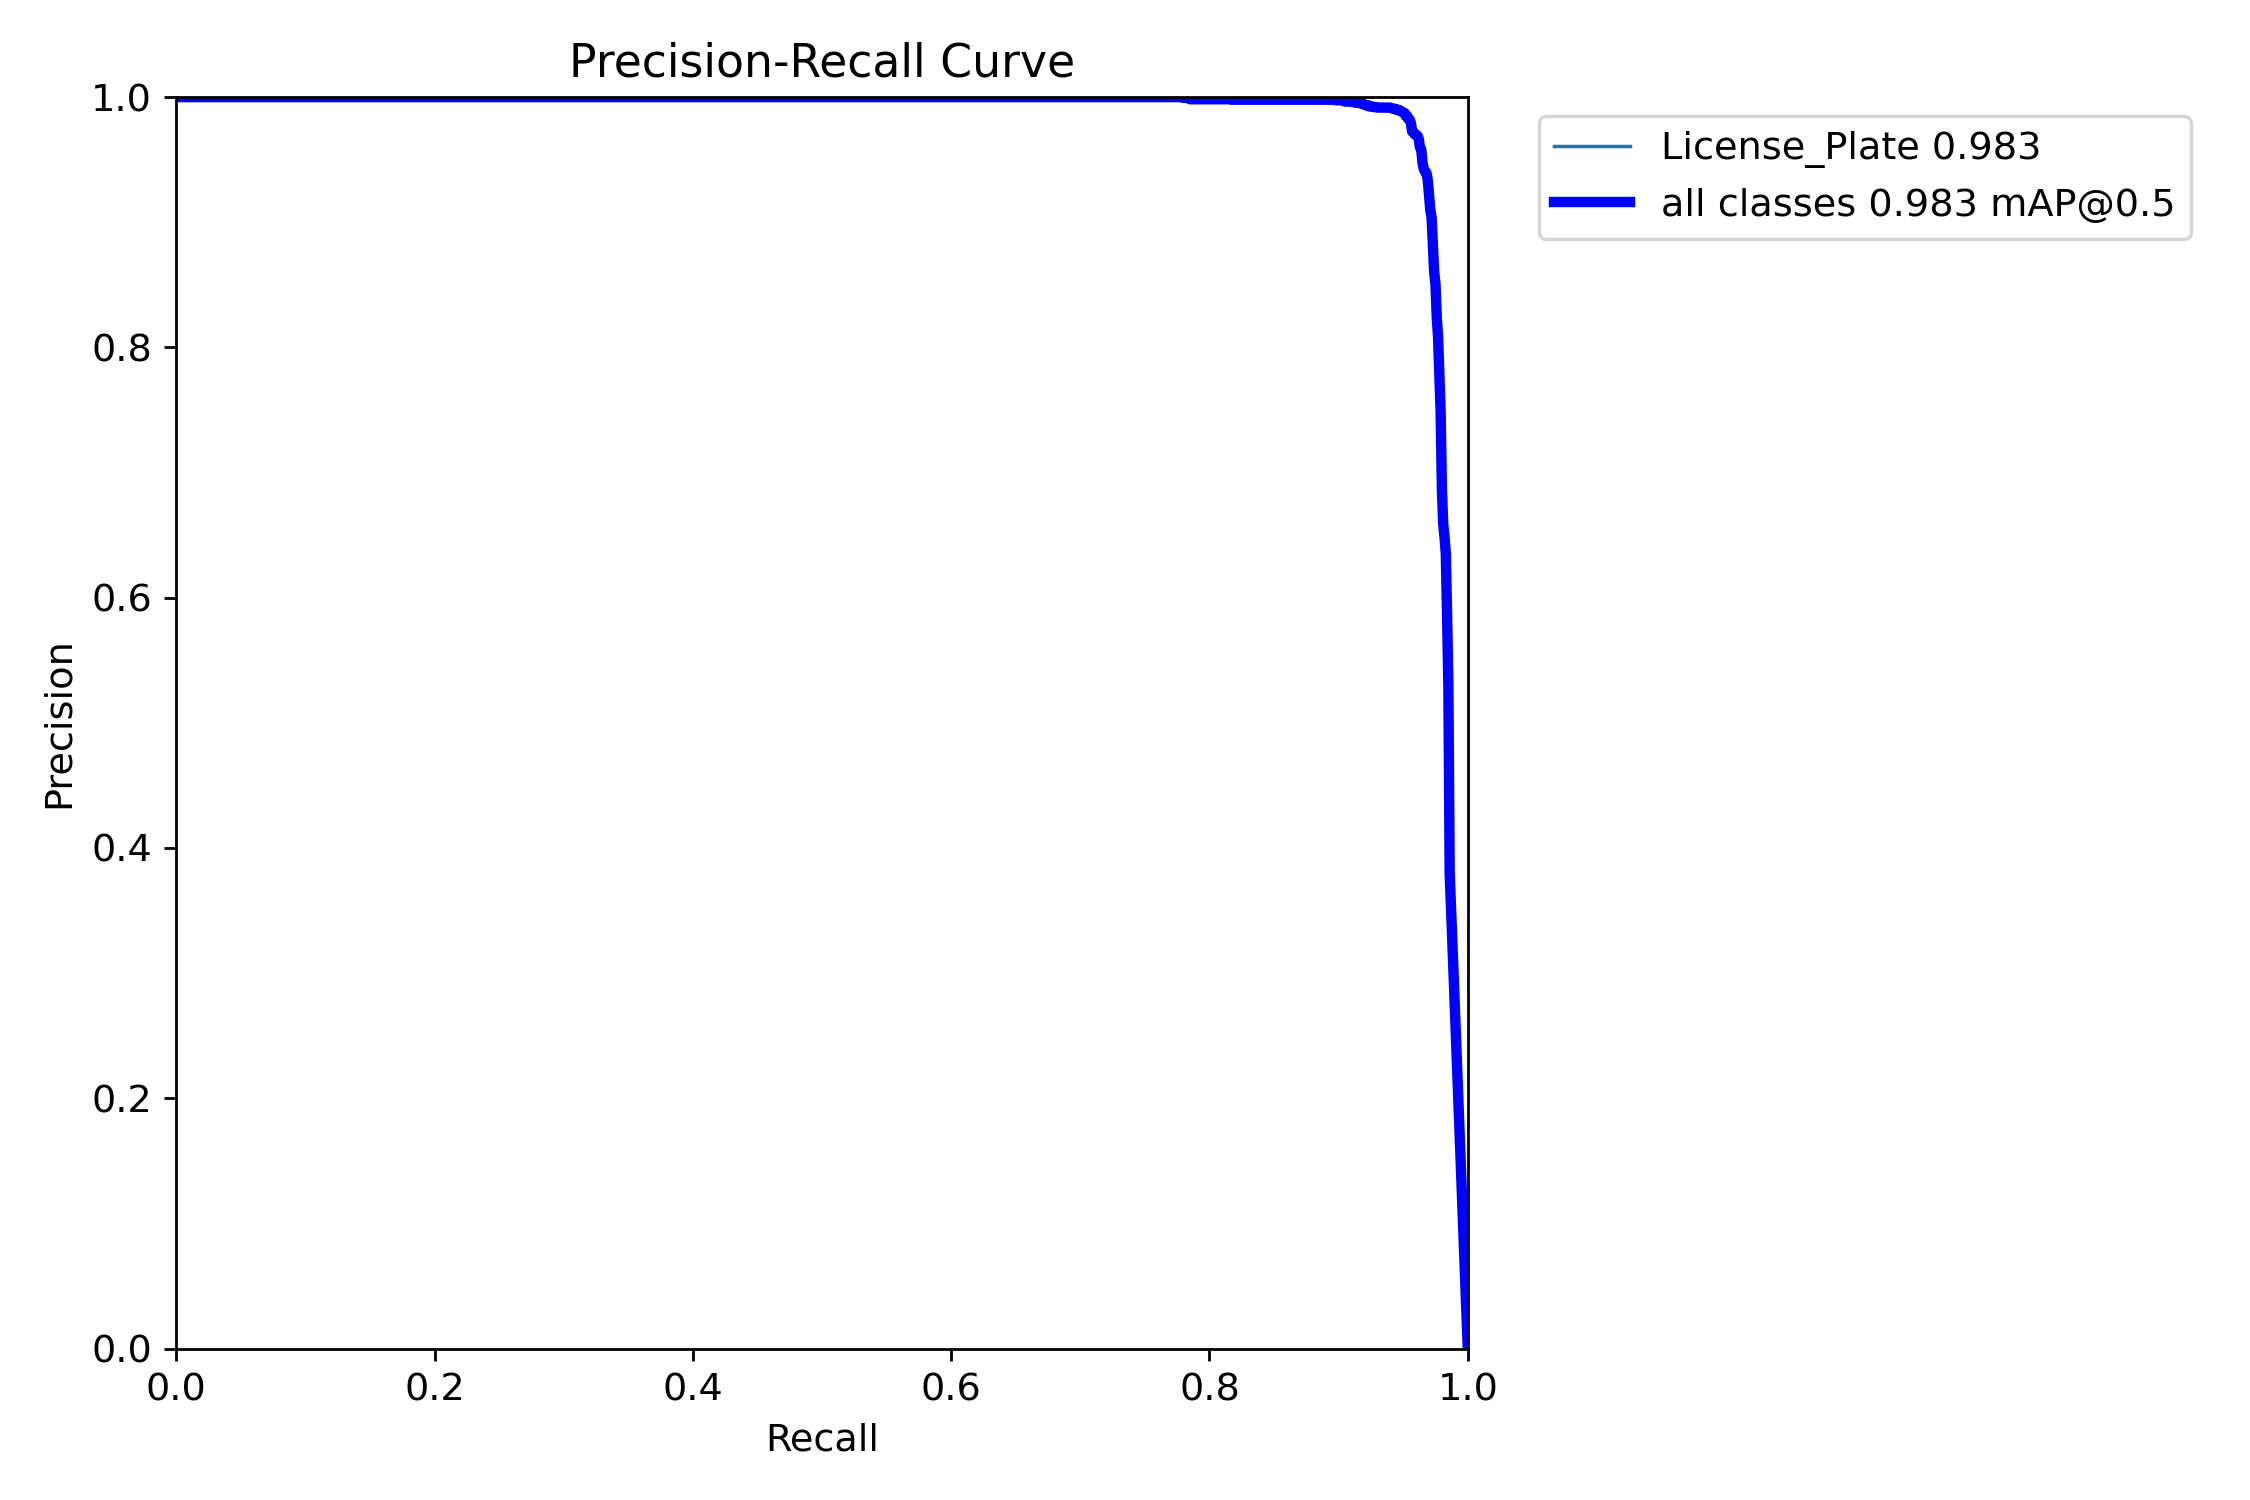

In [ ]:
img = Image.open('/content/drive/MyDrive/runs/runs/detect/train/PR_curve.png')
display.display(img)

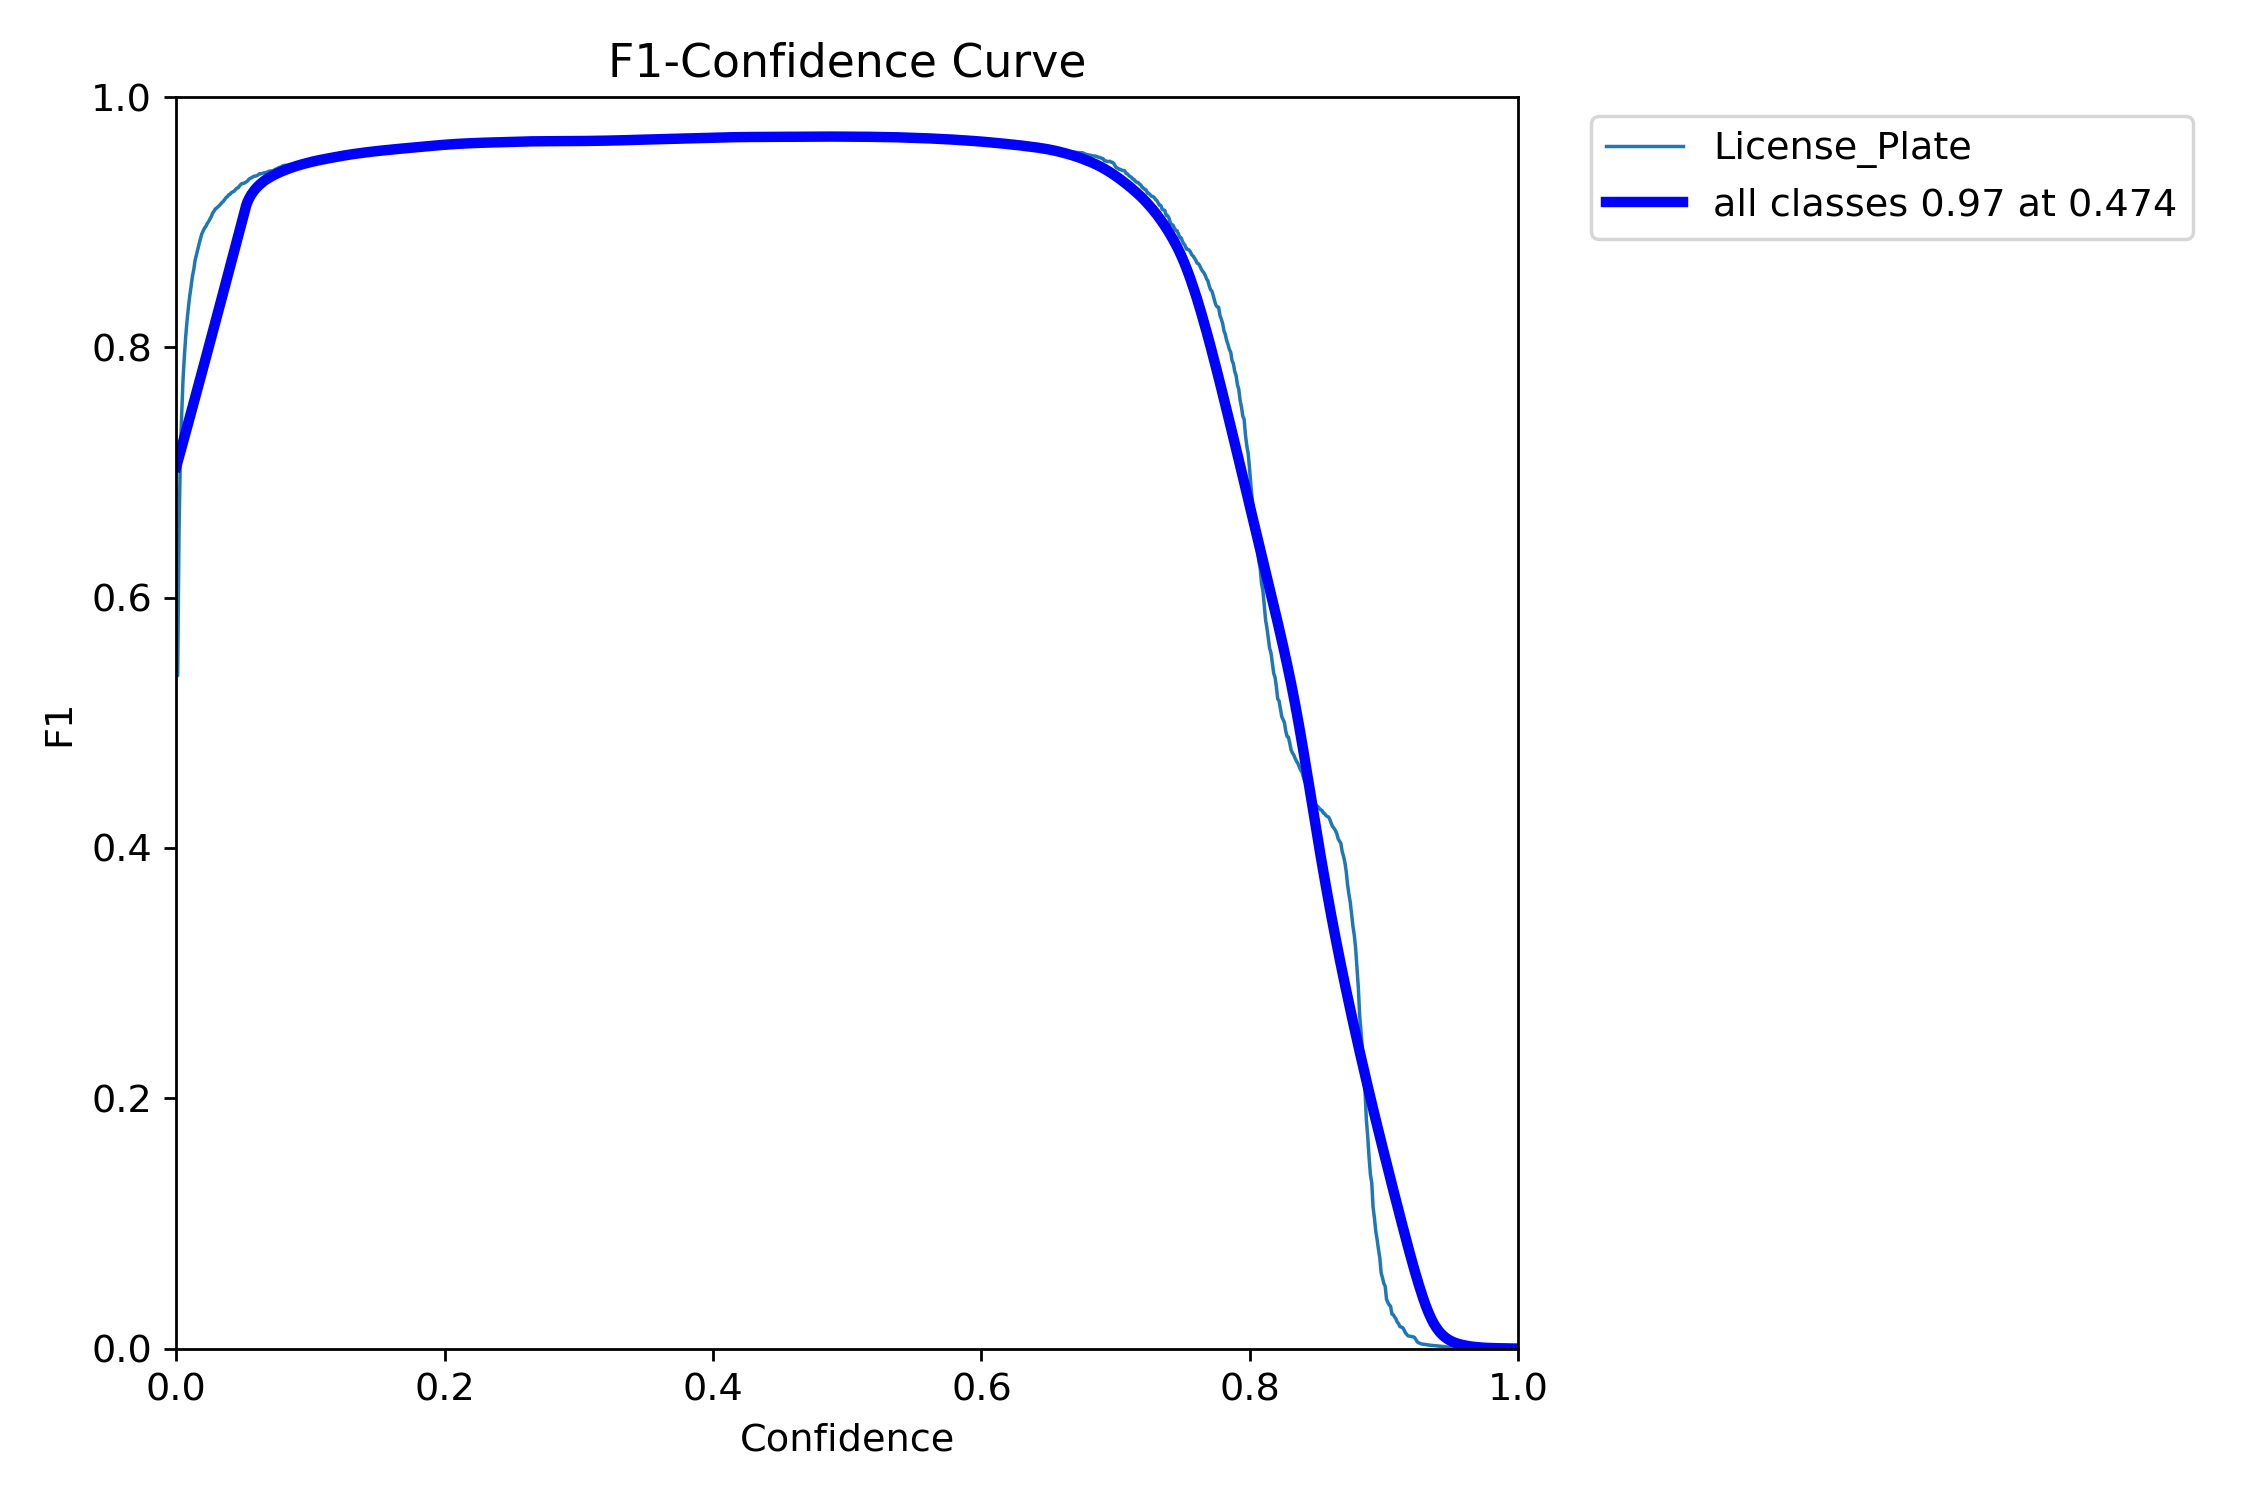

In [ ]:
img = Image.open('/content/drive/MyDrive/runs/runs/detect/train/F1_curve.png')
display.display(img)

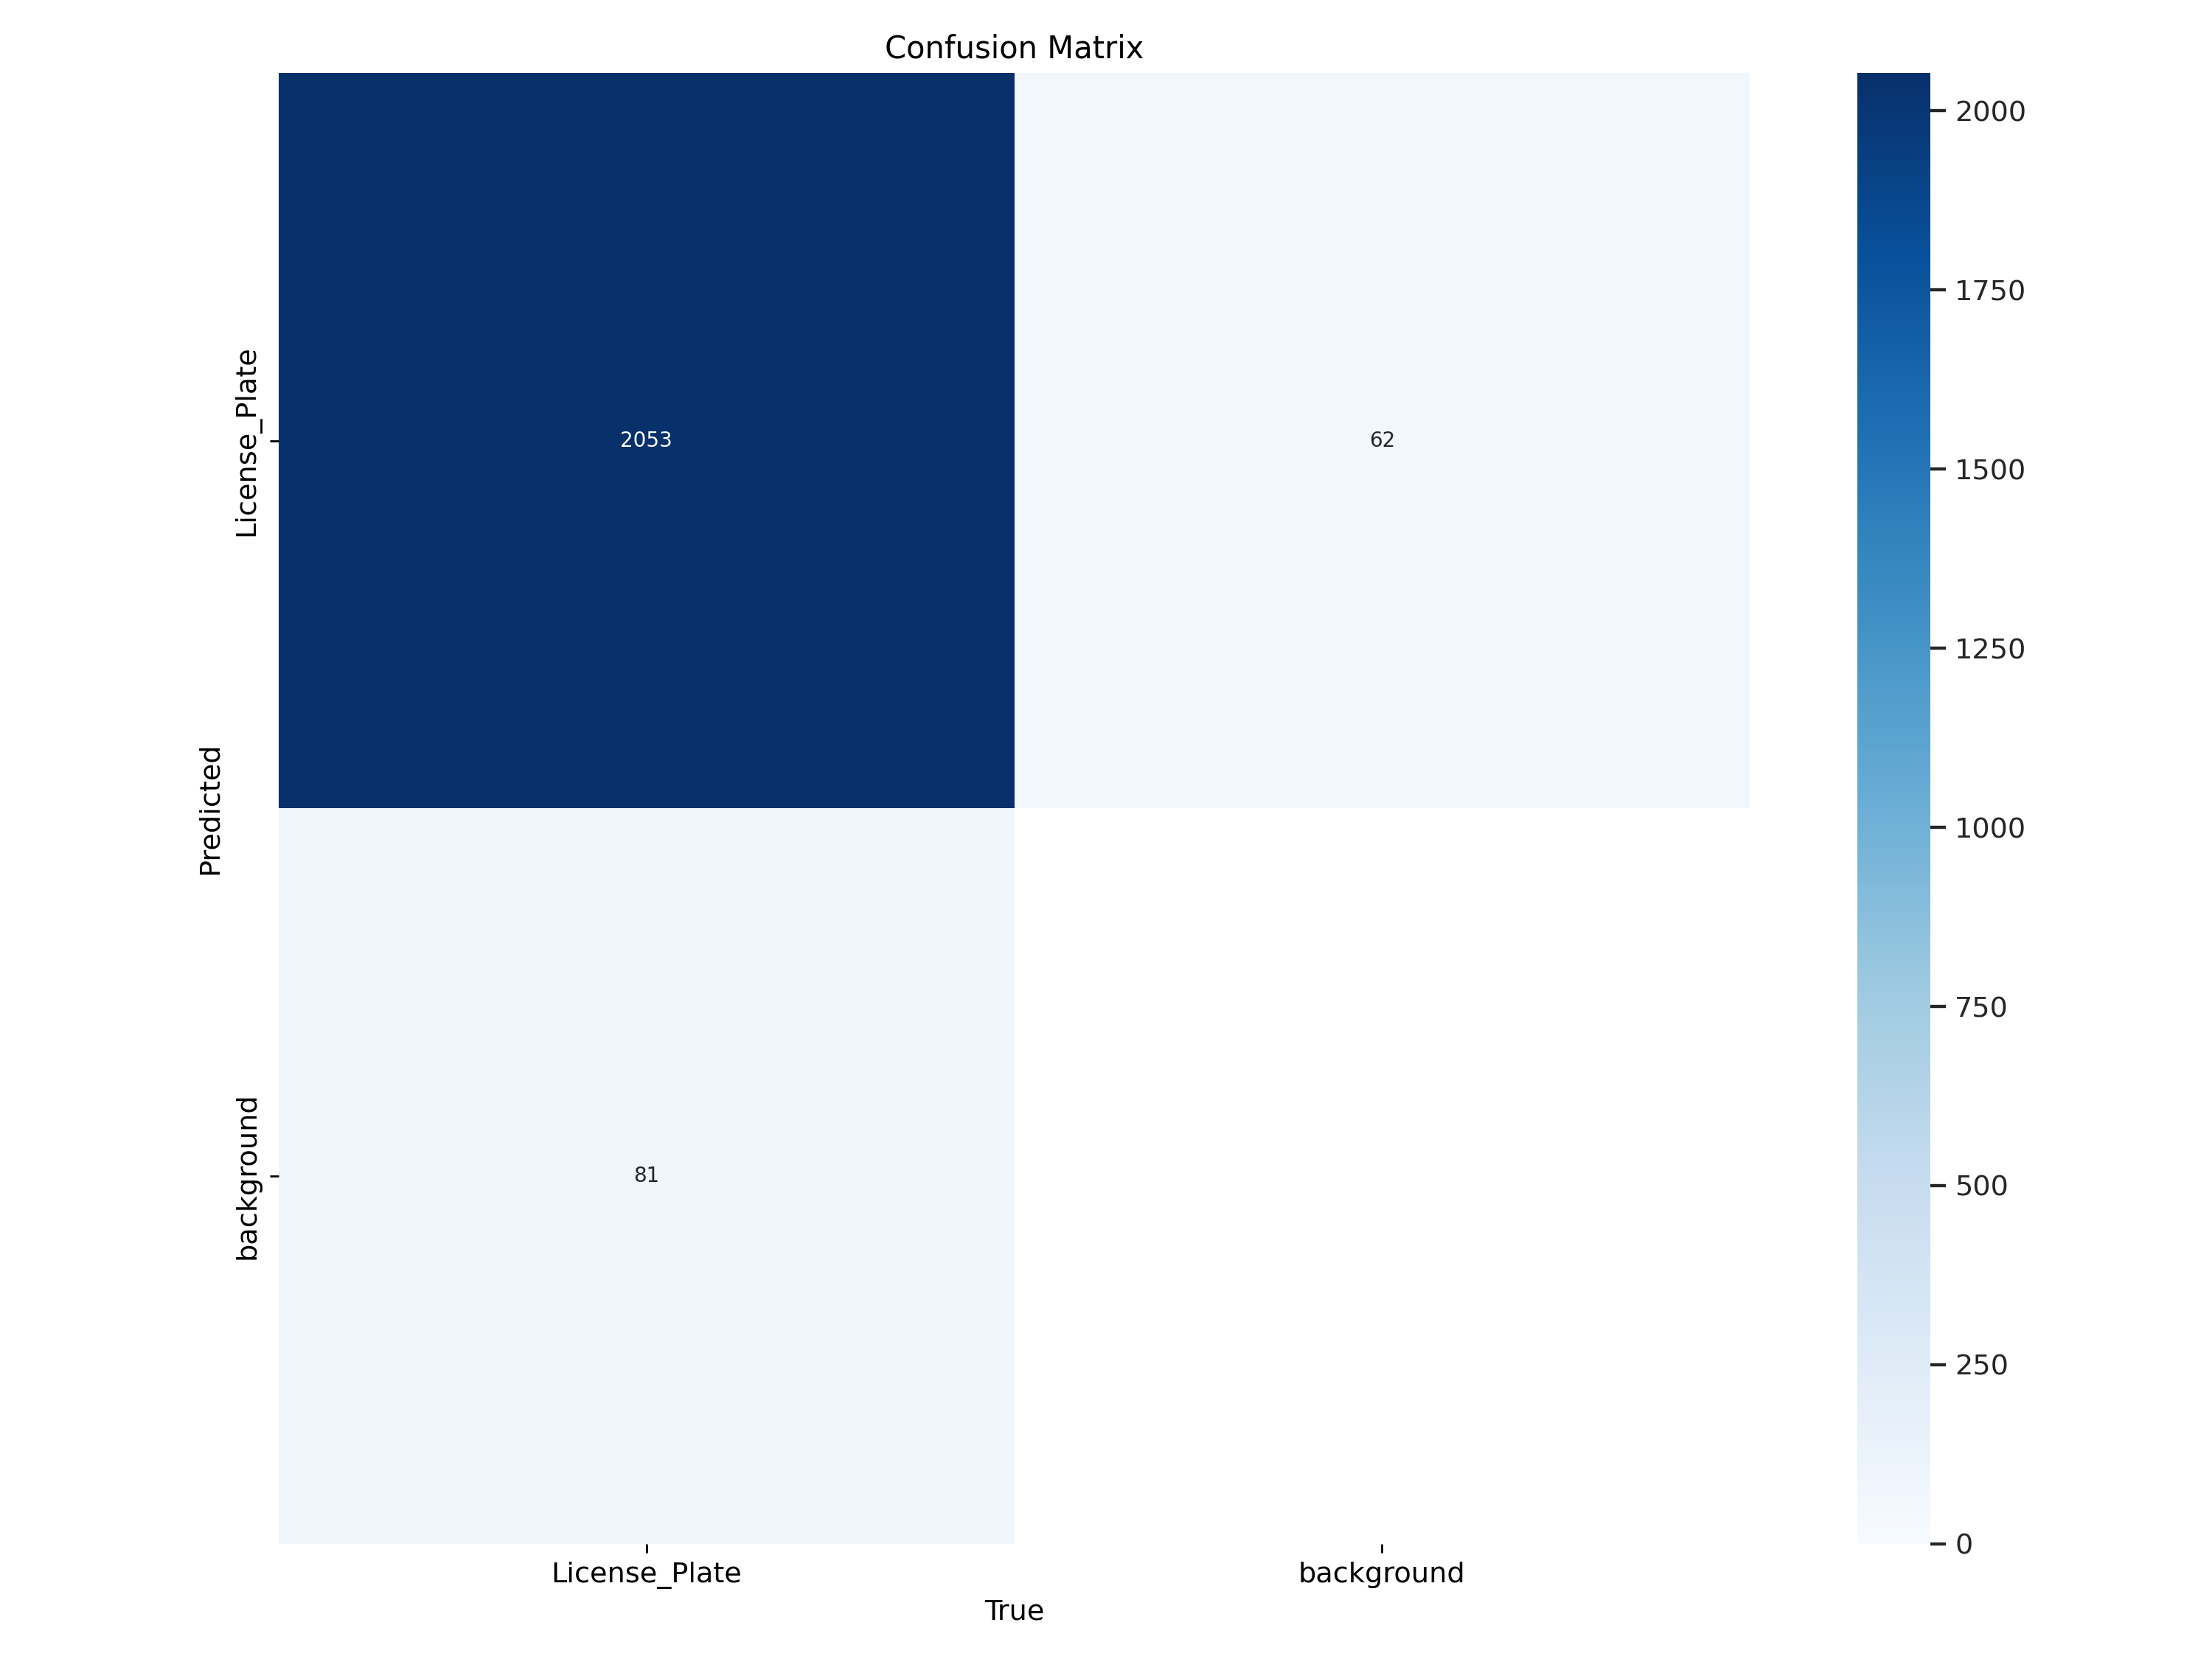

In [ ]:
img = Image.open('/content/drive/MyDrive/runs/runs/detect/train/confusion_matrix.png')
display.display(img)

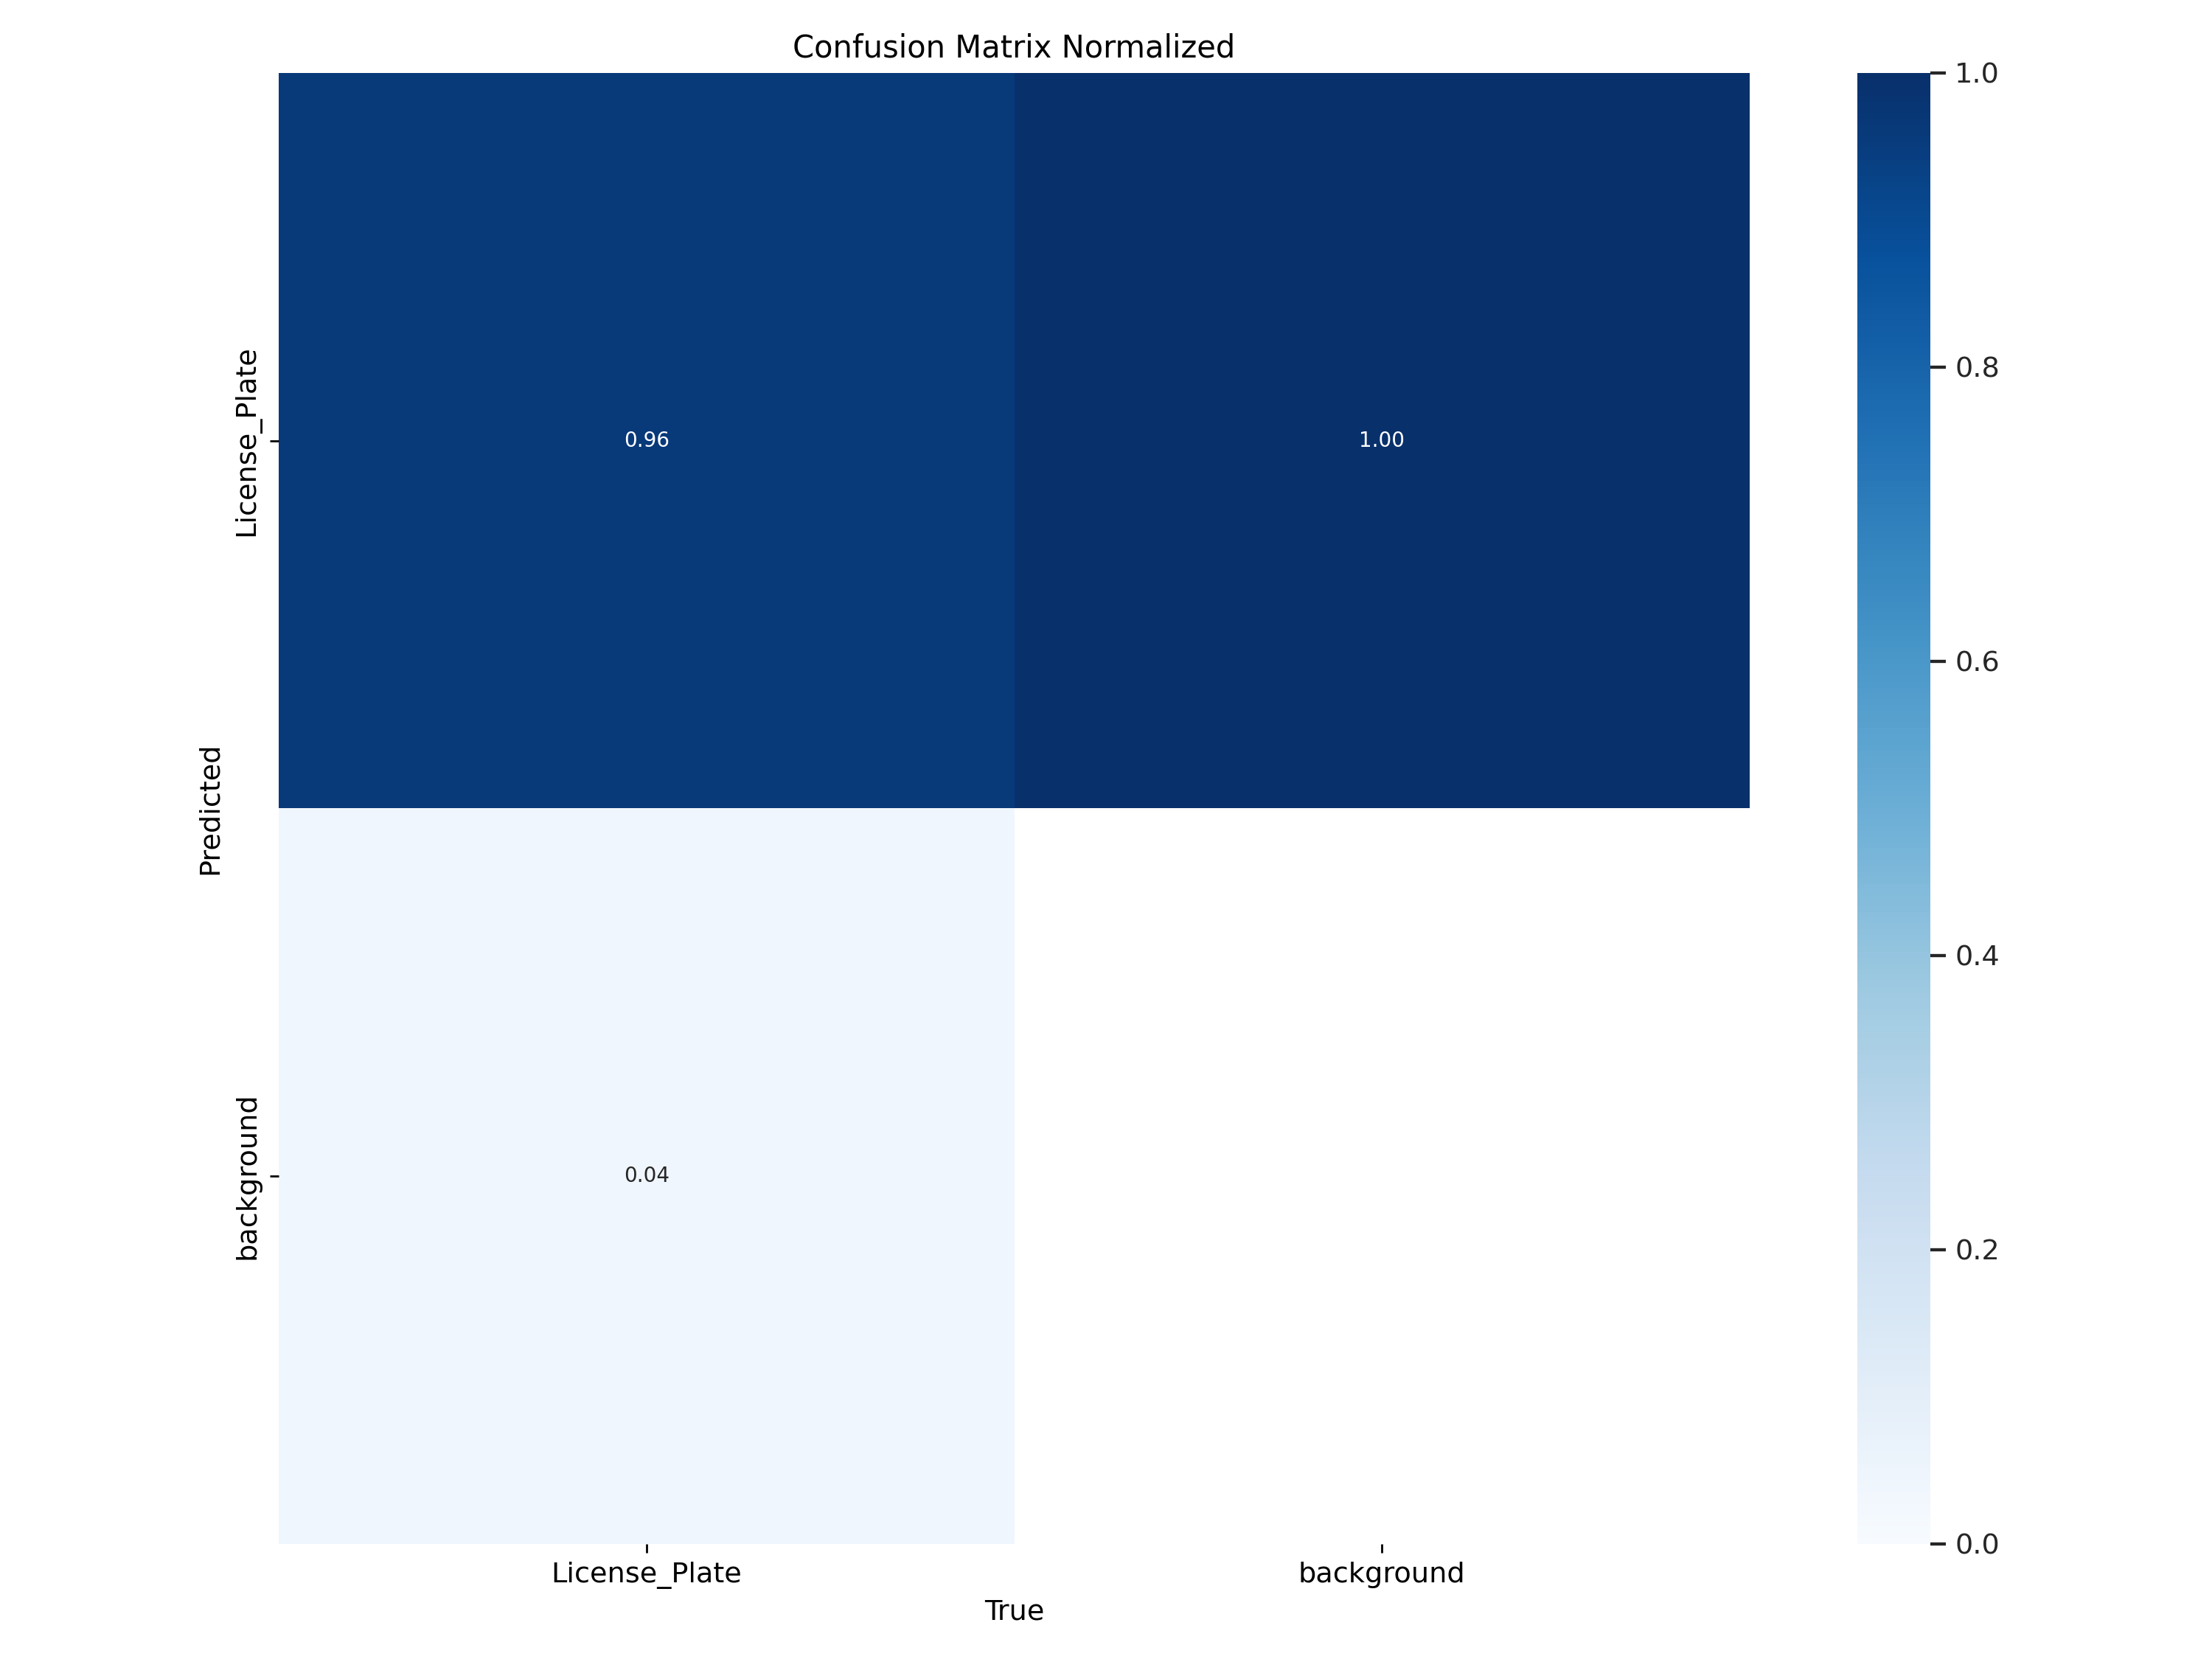

In [ ]:
img = Image.open('/content/drive/MyDrive/runs/runs/detect/train/confusion_matrix_normalized.png')
display.display(img)

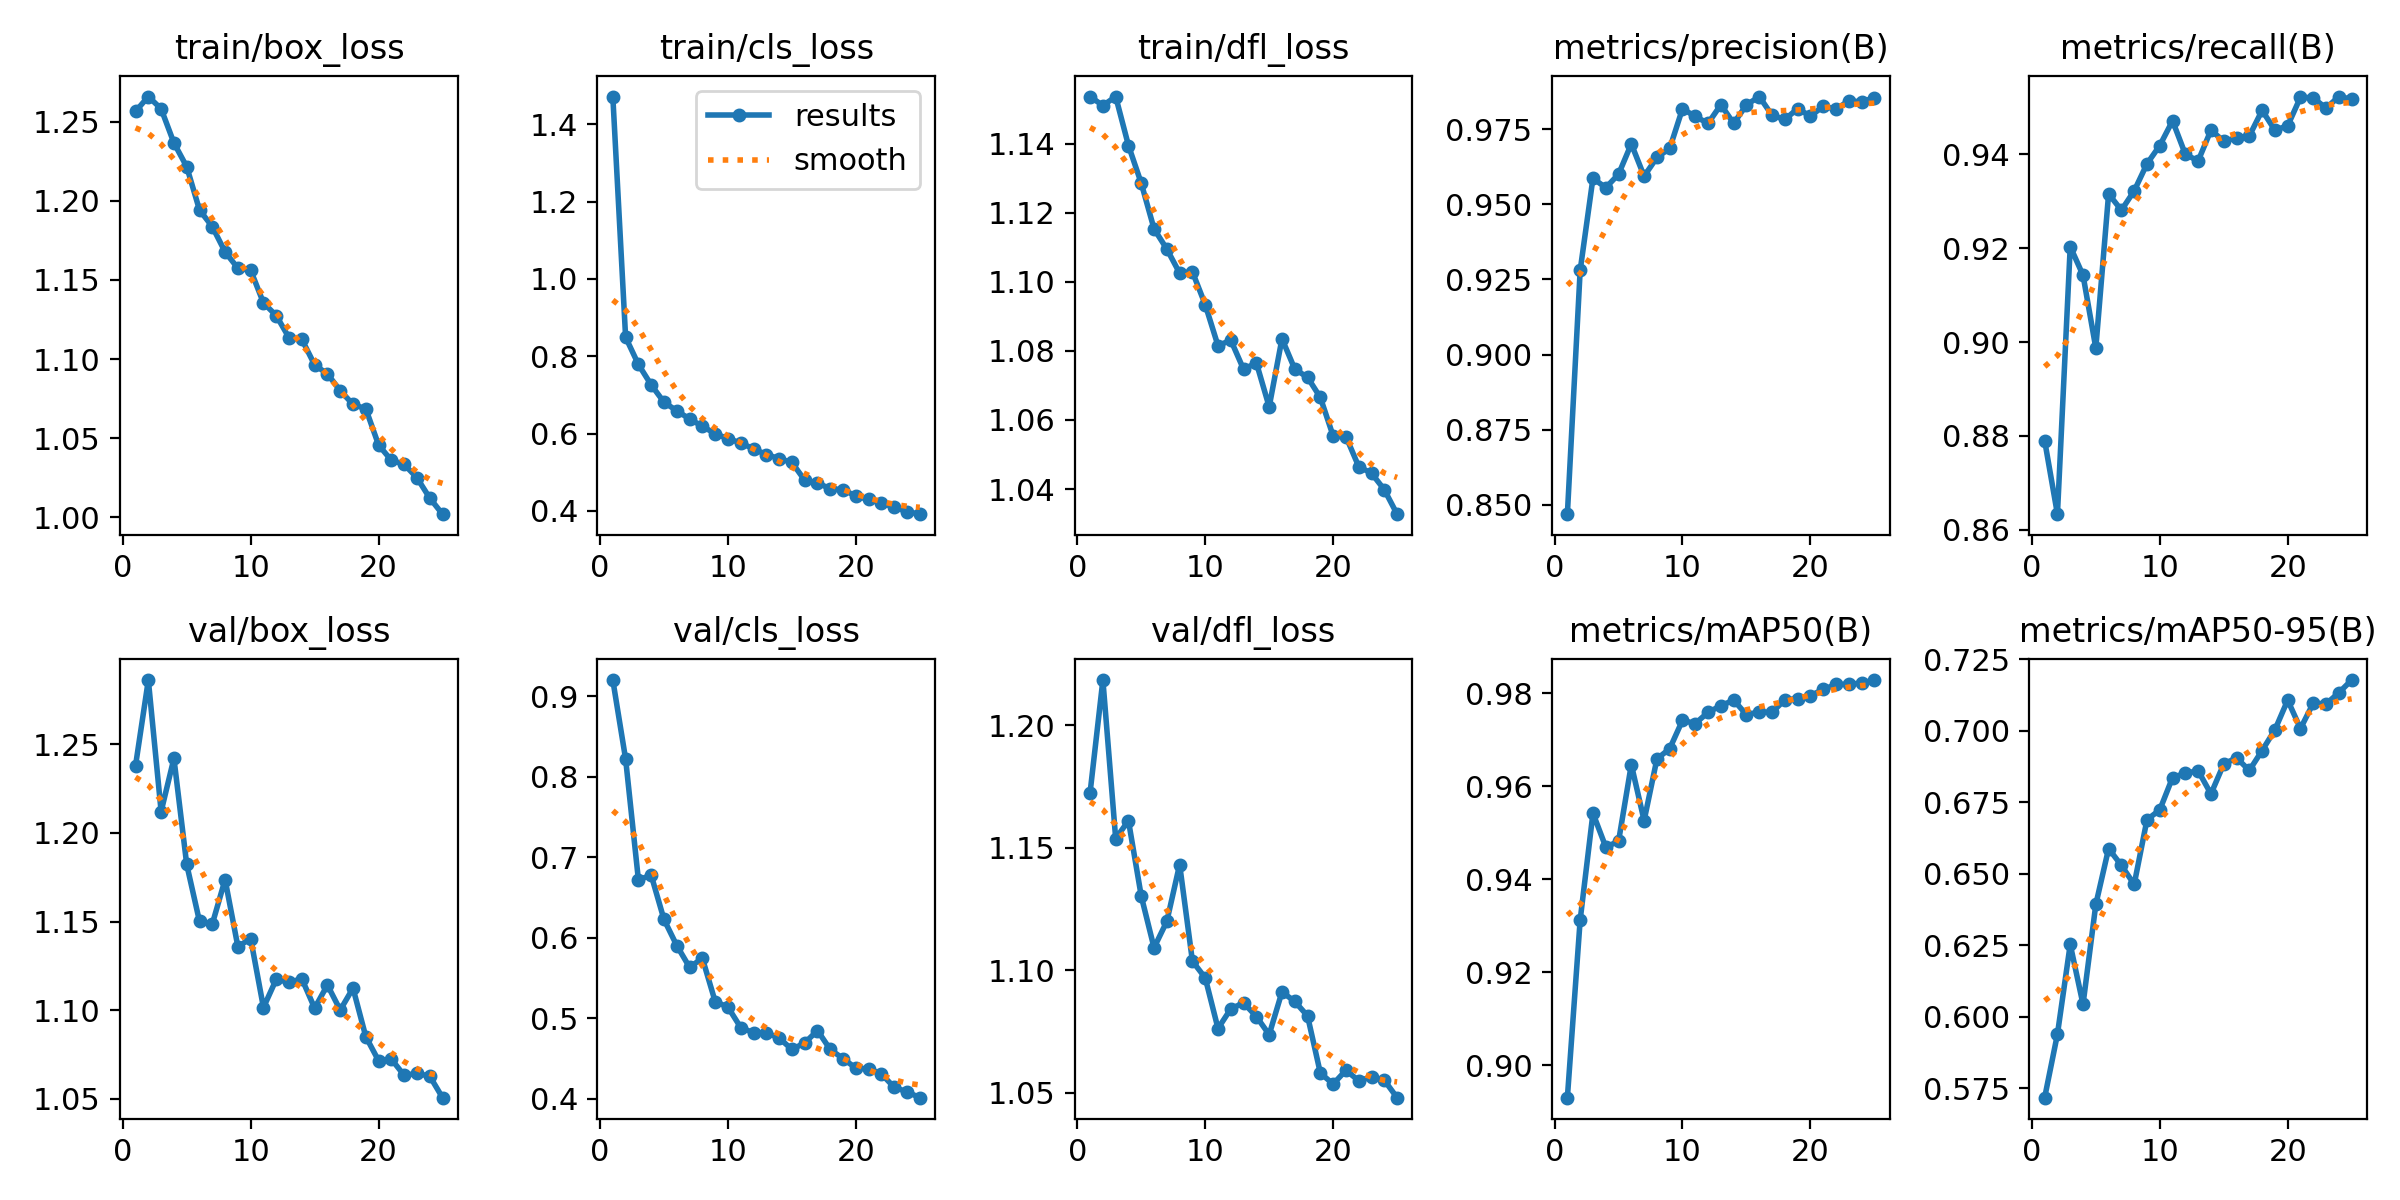

In [ ]:
img = Image.open('/content/drive/MyDrive/runs/runs/detect/train/results.png')
display.display(img)

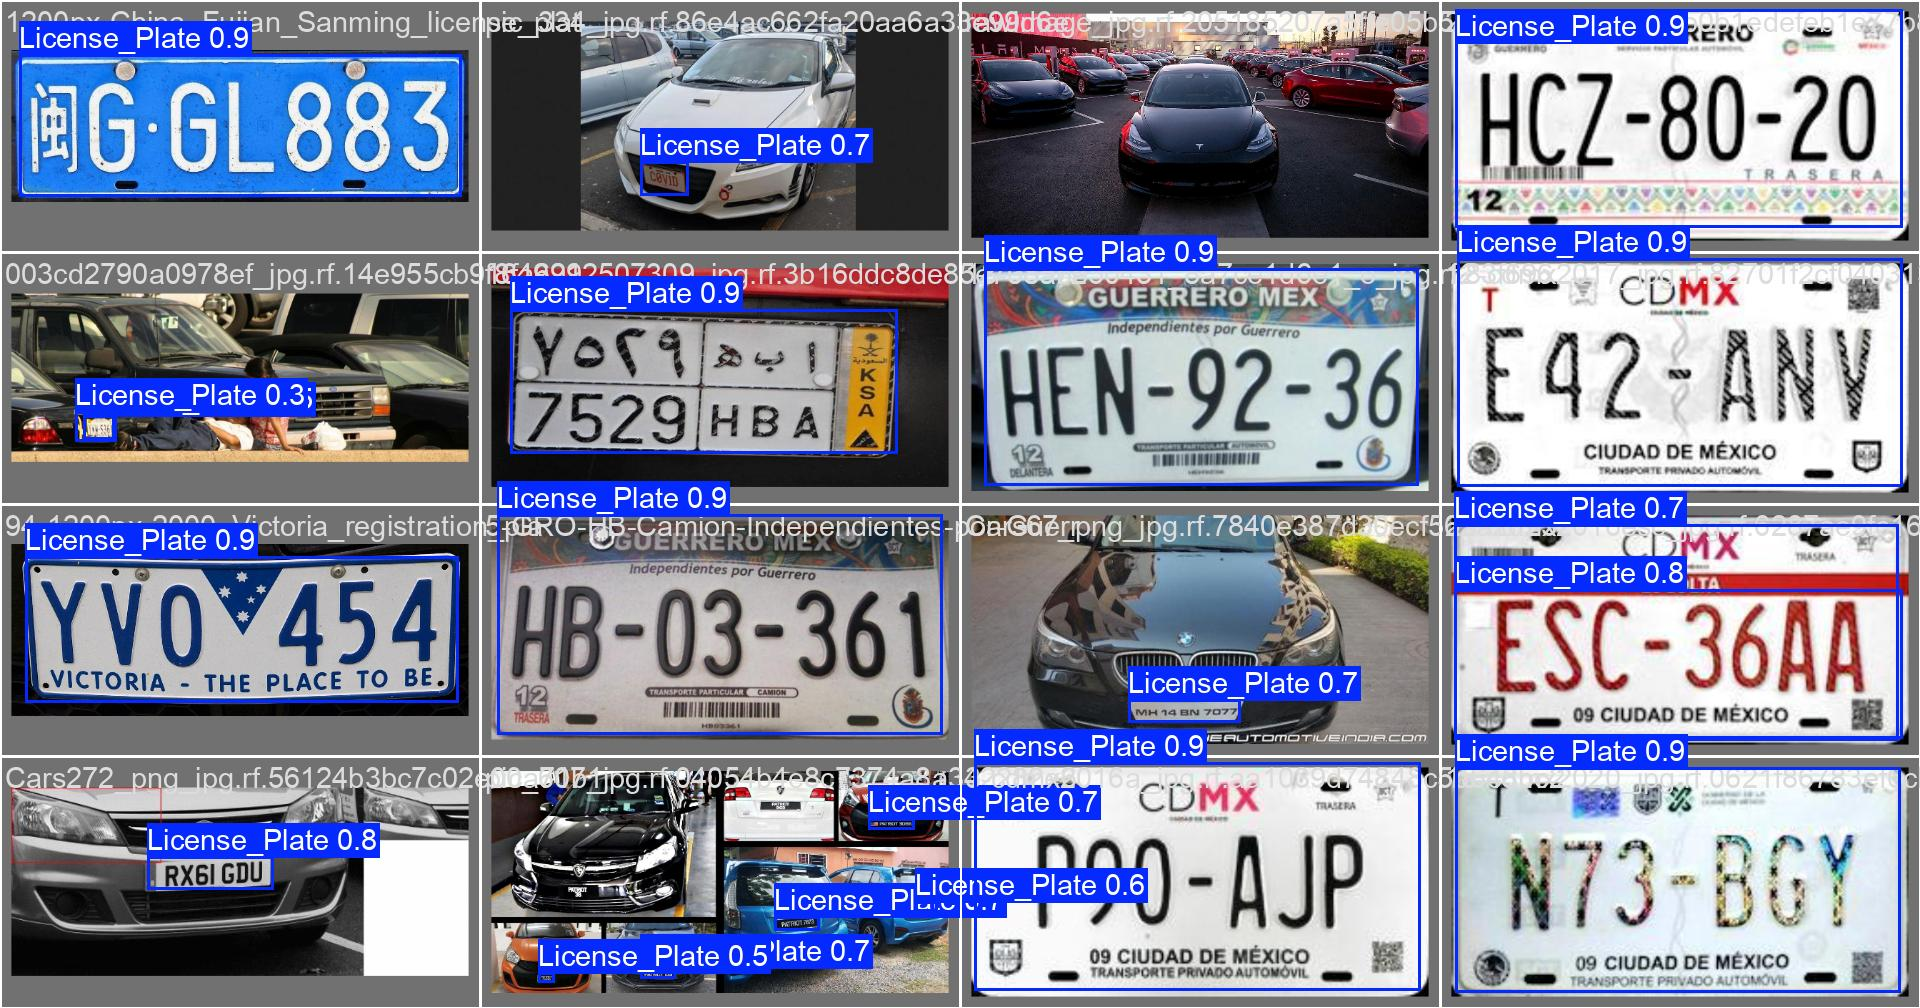

In [ ]:
img = Image.open('/content/drive/MyDrive/runs/runs/detect/train/val_batch0_pred.jpg')
display.display(img)

In [ ]:
!gdown --fuzzy "https://drive.google.com/file/d/1J04inAgTq6sEFeCp6QHO6AhMK5LhX00i/view?usp=sharing" -O best.pt
!gdown --fuzzy "https://drive.google.com/file/d/1k-AjR7ivi02t30co_RmRcBPKZ15-CYU6/view?usp=sharing" -O test.jpg

## **Inference on Image**

In [ ]:
!yolo task = detect mode = predict conf = 0.25 model = /content/best.pt source = /content/test.jpg

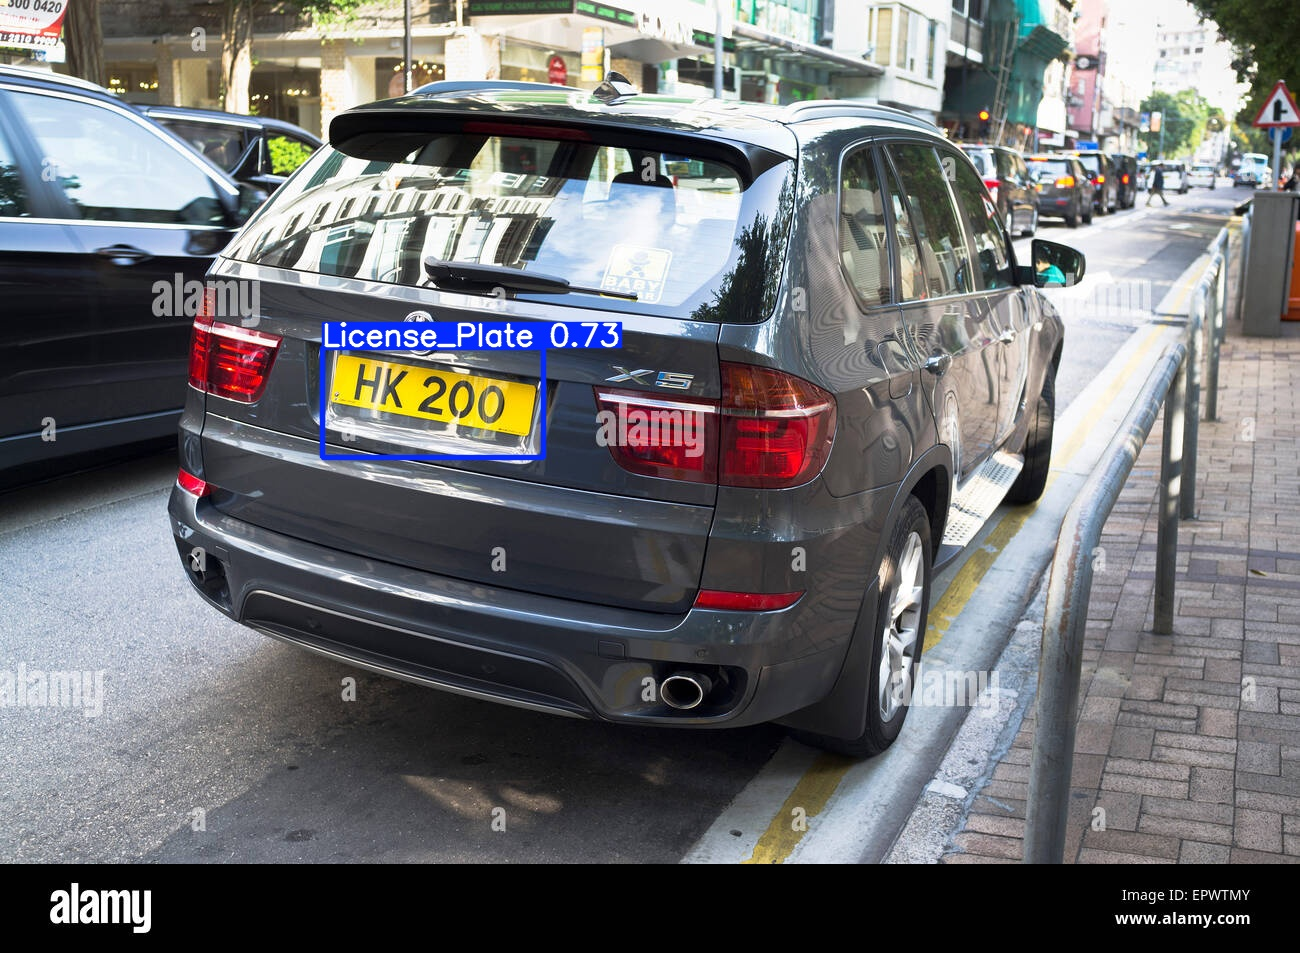

In [ ]:
from IPython.display import Image
Image(filename = "/content/runs/detect/predict2/test.jpg")

## **Inference on Video**

In [ ]:
!gdown --fuzzy "https://drive.google.com/file/d/1WtctT98AnLwThwJ9AcuFmg0zU8h14Qbu/view?usp=share_link" -O test_video.mp4

In [ ]:
!yolo task = detect mode = predict conf = 0.25 model = /content/best.pt source = /content/test_video.mp4 save = True

In [ ]:
!ffmpeg -i /content/runs/detect/predict/test_video.avi -vcodec libx264 -acodec aac /content/test_video_conv.mp4